In [23]:
prin = 100000

prin * .02

2000.0

In [43]:
account = '12345678'

order_types = {
    "market": "1",
    "limit": "2",
    "stop": "3",
    "stop limit": "4",
    "trailing stop": "P",
    "moc": "1",
}

side_dict = {
    "buy": "1",
    "sell": "2",
    "short": "5",
    "cover": "1",
}



    def trade(side, order_type, symbol, quantity, limit_price=0, stop_price=0):
        order = {"TmInForce": f'{"7" if order_type == "moc" else "0"}', "Typ": order_types[order_type],
                 "Side": side_dict[side], "Acct": f'{account}'}
        
        if order_type in ['limit', 'stop limit']:
            order["Px"] = str(limit_price)
        if order_type in ['stop', 'stop limit']:
            order["StopPx"] = str(stop_price)
        
        return order
    
trade("sell", "limit", "BABA", 15, limit_price=15.14, stop_price=17.00)

{'Acct': '12345678', 'Px': '15.14', 'Side': '2', 'TmInForce': '0', 'Typ': '2'}

In [44]:
100000 * .005 - 10

490.0

In [45]:
198.0925 * 1.01

200.07342500000001

In [2]:
# make the FIXML body

In [9]:
import xml.etree.ElementTree as et
from xml.etree.ElementTree import Element, SubElement, dump

In [10]:

xml_declaration = '<?xml version="1.0" encoding="UTF-8"?>'

declaration = Element(xml_declaration)
root = Element("FIXML", {'xmlns': 'http://www.fixprotocol.org/FIXML-5-0-SP2'})
order = SubElement(root, "Order", {"TmInForce": f'{params["time_in_force"]}', 
                                   "Typ": f'{params["trade_type"]}', "Side": f'{params["side"]}', 
                                   "Acct": f'{params["account"]}'})
SubElement(order, "Instrmt", {"SecTyp": f'{params["security_type"]}', "Sym": f'{params["symbol"]}'})
SubElement(order, "OrdQty", {"Qty": f'{params["quantity"]}'})


pprint(et.tostring(root, encoding='utf8', method='xml'))

NameError: name 'params' is not defined

In [11]:
# dictionary of trade types
o

''' can be buy sell short cover '''
trade = 'buy'

xml_declaration = '<?xml version="1.0" encoding="UTF-8"?>'
declaration = Element(xml_declaration)
root = Element("FIXML", {'xmlns': 'http://www.fixprotocol.org/FIXML-5-0-SP2'})
if trade == 'buy':
order= SubElement(root, "Order", f"""{
    'TmInForce': {},
    'Typ': {},
    'Side': {},
    'Acct': {},
    'Px': {},
    'StopPx': {},
    'OrigId': {},
    'ExecInst': {}
    }""")
order = SubElement(root, "Order")

SyntaxError: invalid syntax (<ipython-input-11-d8bab30226f3>, line 2)

In [48]:
from functools import wraps

def taxes(original_function):
    @wraps(original_function)
    def wrapper(*args, **kwargs):
        result = int(original_function(*args, **kwargs) * .7)
        return result
    return wrapper

def transaction_costs(original_function):
    @wraps(original_function)
    def wrapper(*args, **kwargs):
        result = int(original_function(*args, **kwargs) - 10)
        return result
    return wrapper

@transaction_costs
@taxes
def income(principal, daily_return):
    return int(principal * daily_return * .01)

income(20000,2)

270

In [50]:
.13/40

# Note: 
#      Buying on limit at the bid price versus the market price (the ask price) 
#      alone can get me more than half of the way there. 0.30% of the 0.50%.

0.0032500000000000003

In [62]:
length = list()

with open("c:/users/nicho/Desktop/stock-trading/stock_trader/2018-01-22 ticker.csv", "r") as f:
    for line in f.readlines():
        if len(line.split(',')) == 96:
            length.append(line.split(',')[76])

length

['AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',
 'AMD',


0.005

In [94]:
new_index = df.symbol.unique()
ndf = df.copy()
ndf.reindex(new_index)

,adp_100,adp_200,adp_50,adv_21,adv_30,adv_90,ask,ask_time,asksz,basis,...,wk52hidate,wk52lo,wk52lodate,xdate,xday,xmonth,xyear,yield,spread,from-avg
TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WMT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SYF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NVDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BABA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
import pandas as pd

headers = ['adp_100', 'adp_200', 'adp_50', 'adv_21', 'adv_30', 'adv_90', 'ask', 'ask_time', 'asksz', 'basis', 'beta', 'bid', 'bid_time', 'bidsz', 'bidtick', 'chg', 'chg_sign', 'chg_t', 'cl', 'contract_size', 'cusip', 'date', 'datetime', 'days_to_expiration', 'div', 'divexdate', 'divfreq', 'divpaydt', 'dollar_value', 'eps', 'exch', 'exch_desc', 'hi', 'iad', 'idelta', 'igamma', 'imp_volatility', 'incr_vl', 'irho', 'issue_desc', 'itheta', 'ivega', 'last', 'lo', 'name', 'op_delivery', 'op_flag', 'op_style', 'op_subclass', 'openinterest', 'opn', 'opt_val', 'pchg', 'pchg_sign', 'pcls', 'pe', 'phi', 'plo', 'popn', 'pr_adp_100', 'pr_adp_200', 'pr_adp_50', 'pr_date', 'pr_openinterest', 'prbook', 'prchg', 'prem_mult', 'put_call', 'pvol', 'qcond', 'rootsymbol', 'secclass', 'sesn', 'sho', 'strikeprice', 'symbol', 'tcond', 'timestamp', 'tr_num', 'tradetick', 'trend', 'under_cusip', 'undersymbol', 'vl', 'volatility12', 'vwap', 'wk52hi', 'wk52hidate', 'wk52lo', 'wk52lodate', 'xdate', 'xday', 'xmonth', 'xyear', 'yield']
df = pd.read_csv("c:/Users/nicho/Desktop/ticker_export/2018-01-30 ticker.csv", parse_dates=True, names=headers, error_bad_lines=False)

df.shape

df["ask_time"] = df.ask_time.str.replace(":|\.","").astype('int64')
# df["ask_time"] = df.ask_time.astype(int)
df["spread"] = df.bidsz - df.asksz
df["from-avg"] = (df.ask - df.vwap) / df.ask * 100

df['rollin'] = df['bid'].rolling(window=300).mean()
df['difference'] = df['ask'].diff()
df['delta'] = (df['ask'] - df['opn']) / df['opn'] * 100
df['spreadpercent'] = (df.ask - df.bid) / df.bid * 100


df.drop_duplicates(subset=['symbol', 'timestamp'], keep=False)

import numpy as np
table = pd.pivot_table(df, index='timestamp', columns=['symbol'], values='delta')
table

symbol,AAPL,AMD,BABA,F,GE,GLW,GM,KR,MSFT,NSC,NVDA,SYF,T,TSLA,V,WMT,XOM,ZG
timestamp,,,,,,,,,,,,,,,,,,
1517323258,0.256759,0.076220,-0.145963,0.450857,0.372671,-2.197462,0.303526,0.903226,-0.246517,0.371673,0.000000,0.150301,0.535332,0.254969,0.056534,-0.421477,0.742518,-0.465839
1517323264,0.274883,0.076220,-0.125830,0.450857,0.372671,-2.352213,0.326874,0.806452,-0.300107,0.365036,0.053917,0.150301,0.535332,0.168048,0.056534,-0.448965,0.719671,-0.465839
1517323269,0.286966,0.076220,0.000000,0.541028,0.310559,-2.321263,0.443614,0.774194,-0.300107,0.365036,0.004147,0.175351,0.562099,0.257866,0.104991,-0.458127,0.742518,-0.465839
1517323273,0.274883,0.076220,0.035233,0.541028,0.310559,-2.228412,0.420266,0.806452,-0.321543,0.365036,0.107835,0.150301,0.562099,0.292635,0.121144,-0.476452,0.731094,-0.465839
1517323277,0.299048,0.076220,-0.005033,0.541028,0.248447,-2.259362,0.420266,0.838710,-0.310825,0.365036,0.107835,0.175351,0.562099,0.292635,0.121144,-0.476452,0.719671,-0.465839
1517323281,0.286966,0.000000,-0.075498,0.541028,0.248447,-2.321263,0.420266,0.806452,-0.321543,0.365036,0.053917,0.150301,0.535332,0.237585,0.121144,-0.494777,0.719671,-0.465839
1517323284,0.341338,0.076220,-0.050332,0.541028,0.248447,-2.414113,0.420266,0.838710,-0.278671,0.365036,0.174194,0.150301,0.562099,0.237585,0.121144,-0.494777,0.742518,-0.465839
1517323288,0.353421,0.076220,-0.020133,0.541028,0.248447,-2.445063,0.420266,0.806452,-0.278671,0.365036,0.174194,0.125251,0.562099,0.223098,0.113067,-0.540590,0.742518,-0.465839
1517323291,0.365504,0.076220,-0.020133,0.541028,0.248447,-2.228412,0.420266,0.774194,-0.289389,0.365036,0.103687,0.125251,0.562099,0.223098,0.088839,-0.549753,0.742518,-0.465839


<IPython.core.display.Javascript object>


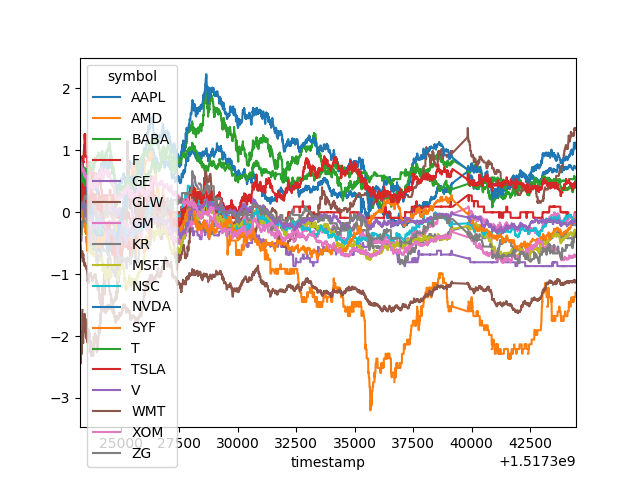

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

table.plot(legend=True)
plt.show()

In [21]:
budget = {
    'rent': 600,
    'utilities': 100,
    'coffee': 100,
    'car': 100,
    'travel': 400,
    'tech': 200,
    'food': 400,
    
}

total = 0
for exp in budget.values():
    total += exp

principal, pl = 25000, .015

income = int( principal * pl * 250 / 30 )

print(f'My total expenses are {total}. This is covered by {income} in income.')

My total expenses are 1900. This is covered by 3125 in income.


In [ ]:
df['rollin'] = pd.rolling_skew

In [56]:
import os
os.path.join(os.path.dirname(os.path.abspath(__file__)) + "ticks", date + " ticker.csv")

NameError: name '__file__' is not defined